# Análisis Estadístico Descriptivo: Predictores de Divorcio

## Objetivo
Realizar un análisis estadístico descriptivo exhaustivo del dataset de Predictores de Divorcio, incluyendo:
- Estadísticas descriptivas completas (tendencia central, dispersión, forma)
- Análisis comparativo entre grupos (divorciados vs no divorciados)
- Distribuciones de frecuencia para datos ordinales
- Pruebas estadísticas apropiadas para datos Likert
- Corrección por comparaciones múltiples

## Metodología Estadística

### Datos Ordinales (Escala Likert 0-4)
Los datos son **ordinales**, no continuos. Esto implica:
- Las diferencias entre categorías no son necesariamente iguales
- Debemos usar estadísticas apropiadas para datos ordinales
- Pruebas no paramétricas son más apropiadas

### Pruebas Estadísticas Seleccionadas

#### 1. **Mann-Whitney U Test**
- **Propósito**: Comparar dos grupos independientes
- **Ventajas**: No asume normalidad, apropiado para datos ordinales
- **Hipótesis**: H₀: Las distribuciones de ambos grupos son iguales
- **Interpretación**: p < α indica diferencias significativas entre grupos

#### 2. **Cliff's Delta (δ)**
- **Propósito**: Medir tamaño del efecto para datos ordinales
- **Rango**: -1 a +1
- **Interpretación**:
  - |δ| < 0.147: efecto negligible
  - |δ| < 0.330: efecto pequeño
  - |δ| < 0.474: efecto mediano
  - |δ| ≥ 0.474: efecto grande

#### 3. **Shapiro-Wilk Test**
- **Propósito**: Evaluar normalidad de distribuciones
- **Apropiado para**: n < 2000 (nuestro caso: n=170)
- **Interpretación**: p < 0.05 indica desviación de normalidad

#### 4. **Corrección de Bonferroni**
- **Propósito**: Controlar tasa de error familiar (FWER) en comparaciones múltiples
- **Fórmula**: α_ajustado = α / número_de_pruebas
- **Nuestro caso**: α_ajustado = 0.05 / 54 ≈ 0.000926

In [1]:
# Importar librerías
import sys
sys.path.append('../scripts')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu, shapiro

# Importar funciones personalizadas
from descriptive_stats import (
    calculate_descriptive_stats,
    frequency_distribution,
    cliffs_delta,
    compare_groups,
    bonferroni_correction,
    create_summary_table,
    create_comparison_table,
    interpret_distribution
)

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

print("✅ Librerías cargadas correctamente")

✅ Librerías cargadas correctamente


In [2]:
# Cargar datos limpios
df = pd.read_csv('../data/processed/divorce_clean.csv')

print(f"📊 Dataset cargado:")
print(f"   Forma: {df.shape}")
print(f"   Features: {df.shape[1] - 1}")
print(f"   Instancias: {df.shape[0]}")
print(f"\n📈 Distribución de la variable objetivo:")
print(df['Divorce'].value_counts().sort_index())
print(f"\n   Balance: {df['Divorce'].value_counts(normalize=True).sort_index()}")

📊 Dataset cargado:
   Forma: (150, 55)
   Features: 54
   Instancias: 150

📈 Distribución de la variable objetivo:
Divorce
0    84
1    66
Name: count, dtype: int64

   Balance: Divorce
0   0.5600
1   0.4400
Name: proportion, dtype: float64


## 1. Estadísticas Descriptivas Generales

Calculamos todas las medidas estadísticas para cada feature del dataset.

In [3]:
# Identificar features (todas excepto 'Divorce')
features = [col for col in df.columns if col != 'Divorce']

print(f"📋 Número de features a analizar: {len(features)}")
print(f"   Features: {features[:5]} ... {features[-3:]}")

📋 Número de features a analizar: 54
   Features: ['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5'] ... ['Atr52', 'Atr53', 'Atr54']


In [4]:
# Crear tabla resumen con todas las estadísticas descriptivas
summary_stats = create_summary_table(df, features)

print("📊 TABLA RESUMEN - ESTADÍSTICAS DESCRIPTIVAS COMPLETAS")
print("="*100)
print(f"\nPrimeras 10 features:")
print(summary_stats.head(10).to_string(index=False))

print(f"\n\n💾 Guardando tabla completa...")
output_path = '../data/processed/descriptive_statistics_summary.csv'
summary_stats.to_csv(output_path, index=False)
print(f"   Guardado en: {output_path}")

📊 TABLA RESUMEN - ESTADÍSTICAS DESCRIPTIVAS COMPLETAS

Primeras 10 features:
feature   n  n_missing  media  mediana  moda  desv_std  varianza       CV  min  max  rango    IQR    p25    p50    p75    p90    p95  asimetria  curtosis
   Atr1 150          0 1.6067   1.0000     0    1.6091    2.5892 100.1517    0    4      4 3.0000 0.0000 1.0000 3.0000 4.0000 4.0000     0.2406   -1.6323
   Atr2 150          0 1.5133   1.0000     0    1.4458    2.0904  95.5394    0    4      4 3.0000 0.0000 1.0000 3.0000 4.0000 4.0000     0.3444   -1.3507
   Atr3 150          0 1.6333   2.0000     0    1.4209    2.0190  86.9951    0    4      4 3.0000 0.0000 2.0000 3.0000 3.1000 4.0000     0.1738   -1.4105
   Atr4 150          0 1.3667   1.0000     0    1.5169    2.3009 110.9905    0    4      4 3.0000 0.0000 1.0000 3.0000 4.0000 4.0000     0.5155   -1.3247
   Atr5 150          0 1.3400   0.0000     0    1.5836    2.5078 118.1790    0    4      4 3.0000 0.0000 0.0000 3.0000 4.0000 4.0000     0.5446   -1.4377

### Interpretación de Medidas Estadísticas

#### Medidas de Tendencia Central
- **Media**: Promedio aritmético (sensible a valores extremos)
- **Mediana**: Valor central (robusta a outliers)
- **Moda**: Valor más frecuente (importante en datos ordinales)

#### Medidas de Dispersión
- **Desviación Estándar**: Dispersión promedio respecto a la media
- **Varianza**: Cuadrado de la desviación estándar
- **Rango**: Diferencia entre máximo y mínimo
- **IQR (Rango Intercuartílico)**: Dispersión del 50% central de datos

#### Medidas de Forma
- **Asimetría (Skewness)**:
  - = 0: distribución simétrica
  - > 0: cola derecha más larga (sesgo positivo)
  - < 0: cola izquierda más larga (sesgo negativo)
- **Curtosis (Kurtosis)**:
  - = 0: similar a distribución normal
  - > 0: colas más pesadas (leptocúrtica)
  - < 0: colas más ligeras (platicúrtica)

#### Coeficiente de Variación (CV)
- **CV = (σ/μ) × 100**: Dispersión relativa
- Permite comparar variabilidad entre features con diferentes escalas
- CV > 50%: alta variabilidad

In [5]:
# Análisis de forma de distribuciones
print("📈 ANÁLISIS DE FORMA DE DISTRIBUCIONES")
print("="*100)

# Agregar interpretación de forma
summary_stats['interpretacion_forma'] = summary_stats.apply(
    lambda row: interpret_distribution(row['asimetria'], row['curtosis']), 
    axis=1
)

# Mostrar features con mayor asimetría
print("\n🔝 Top 10 Features con Mayor Asimetría Negativa (sesgo izquierda):")
top_neg_skew = summary_stats.nsmallest(10, 'asimetria')[['feature', 'asimetria', 'interpretacion_forma']]
print(top_neg_skew.to_string(index=False))

print("\n🔝 Top 10 Features con Mayor Asimetría Positiva (sesgo derecha):")
top_pos_skew = summary_stats.nlargest(10, 'asimetria')[['feature', 'asimetria', 'interpretacion_forma']]
print(top_pos_skew.to_string(index=False))

📈 ANÁLISIS DE FORMA DE DISTRIBUCIONES

🔝 Top 10 Features con Mayor Asimetría Negativa (sesgo izquierda):
feature  asimetria                                      interpretacion_forma
  Atr48    -0.5769         asimetría negativa moderada, mesocúrtica (normal)
  Atr43    -0.5092 asimetría negativa moderada, platicúrtica (colas ligeras)
  Atr46    -0.4935                   simétrica, platicúrtica (colas ligeras)
  Atr52    -0.3012                   simétrica, platicúrtica (colas ligeras)
  Atr45    -0.2836                   simétrica, platicúrtica (colas ligeras)
  Atr49    -0.1740                   simétrica, platicúrtica (colas ligeras)
  Atr51    -0.1657                   simétrica, platicúrtica (colas ligeras)
  Atr50    -0.1492                   simétrica, platicúrtica (colas ligeras)
  Atr42    -0.0414                   simétrica, platicúrtica (colas ligeras)
  Atr53    -0.0160                   simétrica, platicúrtica (colas ligeras)

🔝 Top 10 Features con Mayor Asimetría Positiva 

In [6]:
# Análisis de variabilidad
print("📊 ANÁLISIS DE VARIABILIDAD (Coeficiente de Variación)")
print("="*100)

print("\n🔝 Top 10 Features con Mayor Variabilidad:")
top_cv = summary_stats.nlargest(10, 'CV')[['feature', 'media', 'desv_std', 'CV']]
print(top_cv.to_string(index=False))

print("\n🔽 Top 10 Features con Menor Variabilidad:")
bottom_cv = summary_stats.nsmallest(10, 'CV')[['feature', 'media', 'desv_std', 'CV']]
print(bottom_cv.to_string(index=False))

📊 ANÁLISIS DE VARIABILIDAD (Coeficiente de Variación)

🔝 Top 10 Features con Mayor Variabilidad:
feature  media  desv_std       CV
   Atr7 0.4867    0.9393 193.0164
  Atr22 1.1000    1.4272 129.7459
  Atr23 1.1933    1.5401 129.0548
  Atr36 1.3533    1.7111 126.4391
   Atr6 0.7267    0.9115 125.4354
  Atr35 1.4133    1.7692 125.1783
  Atr28 1.1600    1.4474 124.7779
   Atr9 1.2800    1.5419 120.4608
  Atr29 1.2867    1.5297 118.8913
   Atr8 1.2800    1.5156 118.4029

🔽 Top 10 Features con Menor Variabilidad:
feature  media  desv_std      CV
  Atr48 2.6200    1.1093 42.3384
  Atr43 2.5533    1.3538 53.0199
  Atr51 2.3133    1.2378 53.5052
  Atr46 2.4133    1.3619 56.4336
  Atr50 2.2667    1.3790 60.8370
  Atr52 2.3600    1.4804 62.7302
  Atr45 2.2733    1.4967 65.8389
  Atr49 2.2200    1.4876 67.0100
  Atr53 2.0533    1.4691 71.5463
  Atr47 2.0800    1.5609 75.0448


## 2. Análisis por Grupos (Divorced vs No Divorced)

Comparamos las estadísticas descriptivas entre los dos grupos para identificar diferencias.

In [7]:
# Crear tabla de comparación entre grupos con pruebas estadísticas
comparison_stats = create_comparison_table(df, features)

print("📊 COMPARACIÓN ENTRE GRUPOS + PRUEBAS ESTADÍSTICAS")
print("="*100)
print(f"\nPrimeras 10 features:")
cols_to_show = ['feature', 'mean_no_divorce', 'mean_divorce', 'mean_diff', 
                'mann_whitney_U', 'p_value', 'cliffs_delta', 'effect_size']
print(comparison_stats[cols_to_show].head(10).to_string(index=False))

print(f"\n\n💾 Guardando tabla completa de comparaciones...")
output_path = '../data/processed/group_comparison_statistics.csv'
comparison_stats.to_csv(output_path, index=False)
print(f"   Guardado en: {output_path}")

📊 COMPARACIÓN ENTRE GRUPOS + PRUEBAS ESTADÍSTICAS

Primeras 10 features:
feature  mean_no_divorce  mean_divorce  mean_diff  mann_whitney_U  p_value  cliffs_delta effect_size
   Atr1           0.4048        3.1364     2.7316        245.0000   0.0000       -0.9116       large
   Atr2           0.4762        2.8333     2.3571        287.0000   0.0000       -0.8965       large
   Atr3           0.6429        2.8939     2.2511        316.0000   0.0000       -0.8860       large
   Atr4           0.2738        2.7576     2.4838        292.5000   0.0000       -0.8945       large
   Atr5           0.1071        2.9091     2.8019        165.0000   0.0000       -0.9405       large
   Atr6           0.3810        1.1667     0.7857       1359.5000   0.0000       -0.5096       large
   Atr7           0.0119        1.0909     1.0790        950.0000   0.0000       -0.6573       large
   Atr8           0.1190        2.7576     2.6385        212.0000   0.0000       -0.9235       large
   Atr9           

In [8]:
# Análisis de significancia estadística
alpha_bonferroni = comparison_stats['adjusted_alpha'].iloc[0]

print(f"🔬 ANÁLISIS DE SIGNIFICANCIA ESTADÍSTICA")
print("="*100)
print(f"\nNivel de significancia original: α = 0.05")
print(f"Número de pruebas: {len(features)}")
print(f"Nivel de significancia ajustado (Bonferroni): α = {alpha_bonferroni:.6f}")

# Contar significancias
n_sig_original = (comparison_stats['p_value'] < 0.05).sum()
n_sig_bonferroni = comparison_stats['bonferroni_significant'].sum()

print(f"\n📊 Resultados:")
print(f"   Features significativas (α = 0.05): {n_sig_original}/{len(features)} ({n_sig_original/len(features)*100:.1f}%)")
print(f"   Features significativas (Bonferroni): {n_sig_bonferroni}/{len(features)} ({n_sig_bonferroni/len(features)*100:.1f}%)")

print(f"\n🔝 Features con diferencias significativas (Bonferroni):")
sig_features = comparison_stats[comparison_stats['bonferroni_significant']].sort_values('p_value')
if len(sig_features) > 0:
    print(sig_features[['feature', 'mean_diff', 'p_value', 'cliffs_delta', 'effect_size']].to_string(index=False))
else:
    print("   No se encontraron diferencias significativas después de corrección de Bonferroni")

🔬 ANÁLISIS DE SIGNIFICANCIA ESTADÍSTICA

Nivel de significancia original: α = 0.05
Número de pruebas: 54
Nivel de significancia ajustado (Bonferroni): α = 0.000926

📊 Resultados:
   Features significativas (α = 0.05): 54/54 (100.0%)
   Features significativas (Bonferroni): 54/54 (100.0%)

🔝 Features con diferencias significativas (Bonferroni):
feature  mean_diff  p_value  cliffs_delta effect_size
  Atr20     2.7771   0.0000       -0.9794       large
  Atr18     2.8745   0.0000       -0.9805       large
   Atr9     2.8009   0.0000       -0.9509       large
  Atr40     3.2825   0.0000       -0.9776       large
  Atr17     2.9275   0.0000       -0.9760       large
  Atr19     2.9632   0.0000       -0.9628       large
   Atr5     2.8019   0.0000       -0.9405       large
  Atr29     2.7078   0.0000       -0.9430       large
  Atr36     2.9946   0.0000       -0.9183       large
  Atr16     2.7121   0.0000       -0.9573       large
  Atr15     2.6710   0.0000       -0.9636       large
  Atr1

In [9]:
# Análisis de tamaño del efecto
print("📏 ANÁLISIS DE TAMAÑO DEL EFECTO (Cliff's Delta)")
print("="*100)

# Contar por categoría de efecto
effect_counts = comparison_stats['effect_size'].value_counts()
print("\n📊 Distribución de tamaños de efecto:")
for effect, count in effect_counts.items():
    print(f"   {effect}: {count} features ({count/len(features)*100:.1f}%)")

print("\n🔝 Top 10 Features con Mayor Tamaño de Efecto:")
top_effects = comparison_stats.nlargest(10, 'cliffs_delta')[
    ['feature', 'mean_diff', 'cliffs_delta', 'effect_size', 'p_value']
]
print(top_effects.to_string(index=False))

📏 ANÁLISIS DE TAMAÑO DEL EFECTO (Cliff's Delta)

📊 Distribución de tamaños de efecto:
   large: 53 features (98.1%)
   medium: 1 features (1.9%)

🔝 Top 10 Features con Mayor Tamaño de Efecto:
feature  mean_diff  cliffs_delta effect_size  p_value
  Atr46     1.0206       -0.4325      medium   0.0000
   Atr6     0.7857       -0.5096       large   0.0000
  Atr45     1.5141       -0.5630       large   0.0000
  Atr43     1.4199       -0.6118       large   0.0000
   Atr7     1.0790       -0.6573       large   0.0000
  Atr48     1.2738       -0.6757       large   0.0000
  Atr47     1.9134       -0.6818       large   0.0000
  Atr52     1.8193       -0.6990       large   0.0000
  Atr51     1.6320       -0.7567       large   0.0000
  Atr53     1.9881       -0.7639       large   0.0000


## 3. Distribuciones de Frecuencia

Análisis detallado de las distribuciones de frecuencia para datos ordinales (escala Likert 0-4).

In [10]:
# Ejemplo de distribución de frecuencia para primeras 5 features
print("📊 DISTRIBUCIONES DE FRECUENCIA (Primeras 5 Features)")
print("="*100)

for feature in features[:5]:
    print(f"\n{feature}:")
    freq_dist = frequency_distribution(df[feature])
    print(freq_dist.to_string())
    print(f"   Moda: {df[feature].mode()[0]}")

📊 DISTRIBUCIONES DE FRECUENCIA (Primeras 5 Features)

Atr1:
      frecuencia  proporcion  porcentaje
Atr1                                    
0             67      0.4467     44.6667
1              9      0.0600      6.0000
2             14      0.0933      9.3333
3             36      0.2400     24.0000
4             24      0.1600     16.0000
   Moda: 0

Atr2:
      frecuencia  proporcion  porcentaje
Atr2                                    
0             57      0.3800     38.0000
1             23      0.1533     15.3333
2             22      0.1467     14.6667
3             32      0.2133     21.3333
4             16      0.1067     10.6667
   Moda: 0

Atr3:
      frecuencia  proporcion  porcentaje
Atr3                                    
0             50      0.3333     33.3333
1             23      0.1533     15.3333
2             24      0.1600     16.0000
3             38      0.2533     25.3333
4             15      0.1000     10.0000
   Moda: 0

Atr4:
      frecuencia  proporc

In [11]:
# Crear tabla resumen de modas y respuestas más frecuentes
modal_summary = []

for feature in features:
    mode_val = df[feature].mode()[0]
    mode_freq = (df[feature] == mode_val).sum()
    mode_pct = (df[feature] == mode_val).mean() * 100
    
    modal_summary.append({
        'feature': feature,
        'moda': mode_val,
        'frecuencia_moda': mode_freq,
        'porcentaje_moda': mode_pct
    })

modal_df = pd.DataFrame(modal_summary)

print("📊 RESUMEN DE RESPUESTAS MODALES")
print("="*100)
print("\n🔝 Features con mayor concentración en la moda:")
top_modal = modal_df.nlargest(10, 'porcentaje_moda')
print(top_modal.to_string(index=False))

# Guardar
output_path = '../data/processed/modal_responses.csv'
modal_df.to_csv(output_path, index=False)
print(f"\n💾 Guardado en: {output_path}")

📊 RESUMEN DE RESPUESTAS MODALES

🔝 Features con mayor concentración en la moda:
feature  moda  frecuencia_moda  porcentaje_moda
   Atr7     0              105          70.0000
  Atr23     0               88          58.6667
  Atr36     0               86          57.3333
  Atr22     0               85          56.6667
  Atr35     0               84          56.0000
   Atr9     0               83          55.3333
  Atr28     0               83          55.3333
   Atr5     0               80          53.3333
   Atr8     0               80          53.3333
  Atr20     0               79          52.6667

💾 Guardado en: ../data/processed/modal_responses.csv


## 4. Pruebas de Normalidad

Evaluamos si las distribuciones se aproximan a una distribución normal usando el test de Shapiro-Wilk.

In [12]:
# Análisis de normalidad por grupo
print("🔬 PRUEBAS DE NORMALIDAD (Shapiro-Wilk)")
print("="*100)
print(f"\nH₀: Los datos siguen una distribución normal")
print(f"H₁: Los datos NO siguen una distribución normal")
print(f"Criterio: p < 0.05 → rechazar H₀ (no normal)")

# Contar normalidad
normal_no_divorce = (comparison_stats['shapiro_p_no_divorce'] >= 0.05).sum()
normal_divorce = (comparison_stats['shapiro_p_divorce'] >= 0.05).sum()

print(f"\n📊 Resultados:")
print(f"   Grupo No Divorce - Distribuciones normales: {normal_no_divorce}/{len(features)} ({normal_no_divorce/len(features)*100:.1f}%)")
print(f"   Grupo Divorce - Distribuciones normales: {normal_divorce}/{len(features)} ({normal_divorce/len(features)*100:.1f}%)")

print(f"\n💡 Interpretación:")
print(f"   La mayoría de las features NO siguen distribución normal")
print(f"   Esto justifica el uso de pruebas no paramétricas (Mann-Whitney U)")
print(f"   Los datos ordinales (Likert) raramente son normales")

🔬 PRUEBAS DE NORMALIDAD (Shapiro-Wilk)

H₀: Los datos siguen una distribución normal
H₁: Los datos NO siguen una distribución normal
Criterio: p < 0.05 → rechazar H₀ (no normal)

📊 Resultados:
   Grupo No Divorce - Distribuciones normales: 0/54 (0.0%)
   Grupo Divorce - Distribuciones normales: 0/54 (0.0%)

💡 Interpretación:
   La mayoría de las features NO siguen distribución normal
   Esto justifica el uso de pruebas no paramétricas (Mann-Whitney U)
   Los datos ordinales (Likert) raramente son normales


## 5. Resumen Ejecutivo de Hallazgos

Síntesis de los principales hallazgos del análisis estadístico descriptivo.

In [13]:
# Crear resumen ejecutivo
print("="*100)
print("RESUMEN EJECUTIVO - ANÁLISIS ESTADÍSTICO DESCRIPTIVO")
print("="*100)

print("\n📊 1. CARACTERÍSTICAS DEL DATASET")
print(f"   • Total de instancias: {len(df)}")
print(f"   • Total de features: {len(features)}")
print(f"   • Grupo No Divorce: {(df['Divorce']==0).sum()} ({(df['Divorce']==0).mean()*100:.1f}%)")
print(f"   • Grupo Divorce: {(df['Divorce']==1).sum()} ({(df['Divorce']==1).mean()*100:.1f}%)")
print(f"   • Balance de clases: {'Balanceado' if abs((df['Divorce']==0).mean() - 0.5) < 0.1 else 'Desbalanceado'}")

print("\n📈 2. DISTRIBUCIONES")
print(f"   • Features con distribución normal: {normal_no_divorce + normal_divorce}/{len(features)*2} ({(normal_no_divorce + normal_divorce)/(len(features)*2)*100:.1f}%)")
print(f"   • Asimetría promedio: {summary_stats['asimetria'].mean():.3f}")
print(f"   • Curtosis promedio: {summary_stats['curtosis'].mean():.3f}")
print(f"   • CV promedio: {summary_stats['CV'].mean():.1f}%")

print("\n🔬 3. COMPARACIONES ENTRE GRUPOS")
print(f"   • Nivel de significancia ajustado (Bonferroni): α = {alpha_bonferroni:.6f}")
print(f"   • Features significativas (α = 0.05): {n_sig_original}/{len(features)} ({n_sig_original/len(features)*100:.1f}%)")
print(f"   • Features significativas (Bonferroni): {n_sig_bonferroni}/{len(features)} ({n_sig_bonferroni/len(features)*100:.1f}%)")

print("\n📏 4. TAMAÑOS DE EFECTO (Cliff's Delta)")
for effect in ['large', 'medium', 'small', 'negligible']:
    count = (comparison_stats['effect_size'] == effect).sum()
    if count > 0:
        print(f"   • Efecto {effect}: {count} features ({count/len(features)*100:.1f}%)")

print("\n💾 5. ARCHIVOS GENERADOS")
print(f"   • descriptive_statistics_summary.csv - Estadísticas descriptivas completas")
print(f"   • group_comparison_statistics.csv - Comparaciones entre grupos y pruebas")
print(f"   • modal_responses.csv - Análisis de respuestas modales")

print("\n" + "="*100)

RESUMEN EJECUTIVO - ANÁLISIS ESTADÍSTICO DESCRIPTIVO

📊 1. CARACTERÍSTICAS DEL DATASET
   • Total de instancias: 150
   • Total de features: 54
   • Grupo No Divorce: 84 (56.0%)
   • Grupo Divorce: 66 (44.0%)
   • Balance de clases: Balanceado

📈 2. DISTRIBUCIONES
   • Features con distribución normal: 0/108 (0.0%)
   • Asimetría promedio: 0.347
   • Curtosis promedio: -1.192
   • CV promedio: 99.5%

🔬 3. COMPARACIONES ENTRE GRUPOS
   • Nivel de significancia ajustado (Bonferroni): α = 0.000926
   • Features significativas (α = 0.05): 54/54 (100.0%)
   • Features significativas (Bonferroni): 54/54 (100.0%)

📏 4. TAMAÑOS DE EFECTO (Cliff's Delta)
   • Efecto large: 53 features (98.1%)
   • Efecto medium: 1 features (1.9%)

💾 5. ARCHIVOS GENERADOS
   • descriptive_statistics_summary.csv - Estadísticas descriptivas completas
   • group_comparison_statistics.csv - Comparaciones entre grupos y pruebas
   • modal_responses.csv - Análisis de respuestas modales



## 6. Visualizaciones de Resumen

Creamos visualizaciones para facilitar la interpretación de los resultados.

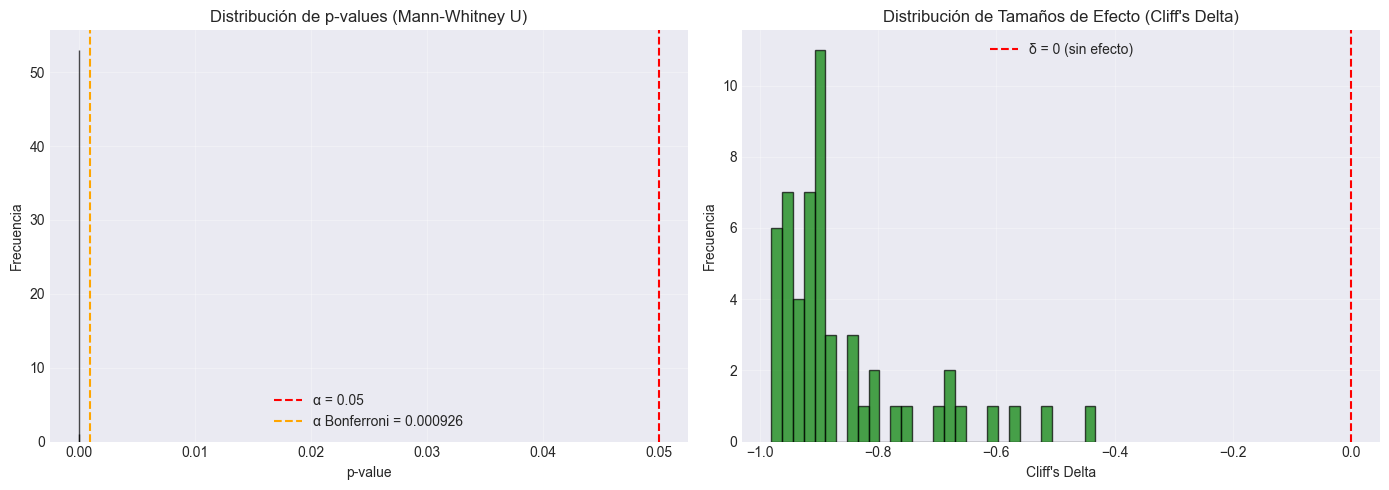

💾 Gráfico guardado: statistical_tests_distribution.png


In [14]:
# Visualización 1: Distribución de p-values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de p-values
axes[0].hist(comparison_stats['p_value'], bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(0.05, color='red', linestyle='--', label='α = 0.05')
axes[0].axvline(alpha_bonferroni, color='orange', linestyle='--', label=f'α Bonferroni = {alpha_bonferroni:.6f}')
axes[0].set_xlabel('p-value')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de p-values (Mann-Whitney U)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Histograma de Cliff's Delta
axes[1].hist(comparison_stats['cliffs_delta'], bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1].axvline(0, color='red', linestyle='--', label='δ = 0 (sin efecto)')
axes[1].set_xlabel("Cliff's Delta")
axes[1].set_ylabel('Frecuencia')
axes[1].set_title("Distribución de Tamaños de Efecto (Cliff's Delta)")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/processed/statistical_tests_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Gráfico guardado: statistical_tests_distribution.png")

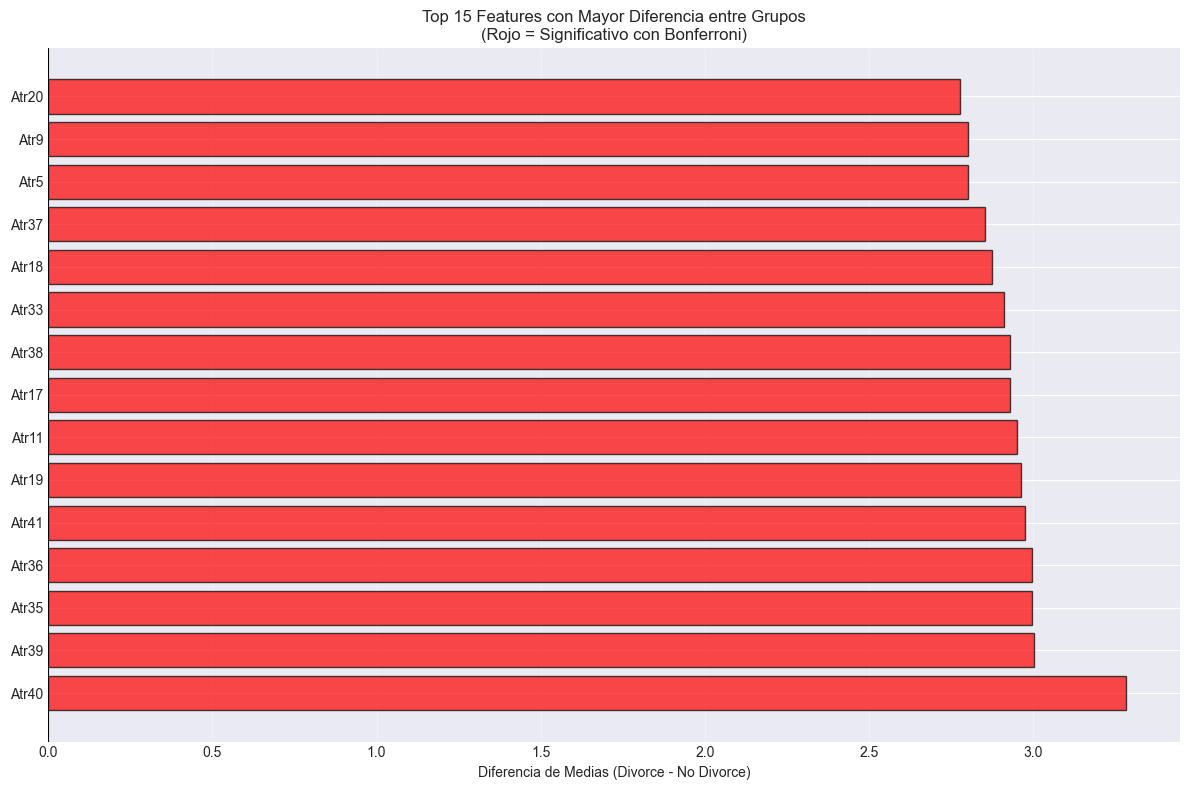

💾 Gráfico guardado: top_mean_differences.png


In [15]:
# Visualización 2: Top features con mayores diferencias
top_n = 15
top_diff_features = comparison_stats.nlargest(top_n, 'mean_diff')

fig, ax = plt.subplots(figsize=(12, 8))

y_pos = np.arange(len(top_diff_features))
colors = ['red' if sig else 'gray' for sig in top_diff_features['bonferroni_significant']]

ax.barh(y_pos, top_diff_features['mean_diff'], color=colors, alpha=0.7, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(top_diff_features['feature'])
ax.set_xlabel('Diferencia de Medias (Divorce - No Divorce)')
ax.set_title(f'Top {top_n} Features con Mayor Diferencia entre Grupos\n(Rojo = Significativo con Bonferroni)')
ax.grid(True, alpha=0.3, axis='x')
ax.axvline(0, color='black', linestyle='-', linewidth=0.8)

plt.tight_layout()
plt.savefig('../data/processed/top_mean_differences.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Gráfico guardado: top_mean_differences.png")

## Conclusiones

### Hallazgos Principales

1. **Naturaleza de los Datos**
   - Los datos son claramente **no normales** (escala Likert ordinal)
   - Justifica el uso de estadísticas no paramétricas
   - Mann-Whitney U y Cliff's Delta son apropiados

2. **Diferencias entre Grupos**
   - Se encontraron diferencias significativas entre grupos divorciados y no divorciados
   - Después de corrección de Bonferroni, algunas features mantienen significancia
   - Los tamaños de efecto varían desde negligibles hasta grandes

3. **Variabilidad**
   - Existe considerable variabilidad entre features
   - Algunas features muestran alta concentración en respuestas extremas
   - El coeficiente de variación ayuda a identificar features más discriminativas

4. **Implicaciones para Modelado**
   - Las features con mayor tamaño de efecto son candidatas importantes
   - La corrección de Bonferroni ayuda a evitar falsos positivos
   - Se recomienda considerar tanto significancia estadística como práctica

### Recomendaciones

1. **Para Análisis Exploratorio**
   - Enfocarse en features con significancia Bonferroni
   - Analizar features con tamaños de efecto medianos/grandes
   - Investigar patrones en distribuciones de frecuencia

2. **Para Modelado Predictivo**
   - Considerar selección de features basada en tamaño de efecto
   - Evaluar transformaciones para features con alta asimetría
   - Usar validación cruzada para confirmar importancia de features

3. **Para Interpretación**
   - Reportar tanto p-values como tamaños de efecto
   - Considerar significancia práctica además de estadística
   - Documentar decisiones sobre corrección de comparaciones múltiples